In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
from numpy import genfromtxt
import math
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import random

### **Training Data**
The data is read from the file. Then it is divided into training and validation sets.

In [0]:
data = genfromtxt('/content/drive/My Drive/Assignment1 Dataset//Datasets/q1/train.csv', delimiter=',')
labels = data [:,0]
np.random.shuffle(labels)
labels = labels.tolist()
np.random.shuffle(data)
validation_data = data[:4000, 1:]
validation_label = data[:4000, 0]
train_data = data[4000:, 1:]
train_label = data[4000:, 0]

### **Euclidean Distance metrics**
The euclidean distance between the actual and predicted data is calculated.

In [0]:
def euclidean_distance(row):
  dist = np.sqrt(np.sum((train_data-row)**2,axis=1))
  return dist

### **Manhattan Distance metrics**
The manhattan distance between the actual and predicted data is calculated.

In [0]:
def manhattan_distance(row):
  dist = np.sum(abs(train_data-row),axis=1)
  return dist

## **Majority Voting**
Voting is done on the k nearest neighbours and the class getting the majority number of votes is returned.

In [0]:
def find_majority_label(k, distance):
  index = np.argsort(distance)
  index = index[:k]
  label = train_label[index]
  li = []
  for i in range(0,k):
    li.append(int(label[i]))

  maxm = 0
  majority_element = li[0] 
  for i in li: 
      freq = li.count(i) 
      if freq > maxm: 
          maxm = freq 
          majority_element = i

  return majority_element 

## **Random Guessing**
A class from the total possible classes is randomly guessed and returned.

In [0]:
def random_guessing():
  return random.choice(labels)

## **Predictions**
This method is performing the KNN classification using Euclidean distance as the distance metric. Here, we use different values of k ranging from 3 to 9. Analyzing the results, we see that **k=3** gives us the best accuracy. For k=3:
*   Accuracy: 96.125%
*   Precision score: 0.962
*   Recall score:0.960
*   F1 score: 0.961

We also display the confusion matrix for each k.

In [0]:
scores_e = []
f1_scores_e = []
for k in range(3,10):
  prediction = []
  for row in validation_data:
    dis = euclidean_distance(row) 
    prediction.append(find_majority_label(k,dis))
  predicted_label = np.array(prediction)
  accuracy = accuracy_score(validation_label, predicted_label)
  print("k=",k,"Accuracy: ",accuracy*100)
  print("k=",k,"Precision score: ",precision_score(validation_label, predicted_label,  average='macro'))
  print("k=",k,"Recall score: ",recall_score(validation_label, predicted_label,  average='macro'))
  f1 = f1_score(validation_label, predicted_label,  average='macro')
  print("k=",k,"F1 score: ",f1)
  print(confusion_matrix(validation_label, predicted_label))
  scores_e.append(accuracy)
  f1_scores_e.append(f1)

k= 3 Accuracy:  96.125
k= 3 Precision score:  0.9620914792879063
k= 3 Recall score:  0.9608668272316848
k= 3 F1 score:  0.9612344709251529
[[409   0   0   0   0   3   0   0   0   2]
 [  0 412   0   0   0   0   1   2   1   0]
 [  4   5 355   3   0   0   1   2   1   1]
 [  0   1   1 395   0   6   0   1   6   2]
 [  0   2   0   0 355   0   2   1   0  10]
 [  2   1   0   6   0 358   4   1   0   4]
 [  1   0   0   0   0   1 398   0   0   0]
 [  0   4   0   0   4   1   0 424   1   7]
 [  3   9   1   8   1   2   3   2 357   7]
 [  1   1   0   3   5   3   0  11   0 382]]
k= 4 Accuracy:  96.05
k= 4 Precision score:  0.9613410476914156
k= 4 Recall score:  0.9601374853771958
k= 4 F1 score:  0.9604841833045897
[[409   0   0   1   0   3   1   0   0   0]
 [  0 412   0   0   0   0   1   2   1   0]
 [  3   5 356   2   0   0   1   3   2   0]
 [  0   1   2 391   0   8   0   1   7   2]
 [  0   2   0   0 356   0   2   1   0   9]
 [  2   3   0   7   0 355   4   0   0   5]
 [  0   0   0   0   0   2 397   1 

### **Plotting**
Plotting Accuracy for different values of k, using euclidean distance as the distance metrics.

Text(0.5, 1.0, 'Accuracy at different k for Euclidean distance metrics')

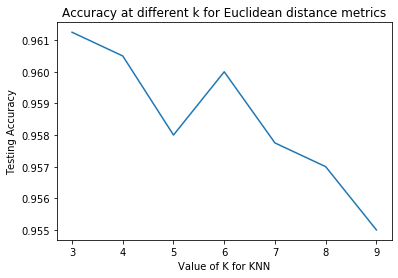

In [0]:
k=[3,4,5,6,7,8,9]
plt.plot(k, scores_e)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy at different k for Euclidean distance metrics")

### **Plotting**
Plotting F1 scores for different values of k, using euclidean distance as the distance metrics.

Text(0.5, 1.0, 'F1 scores at different k for Euclidean distance metrics')

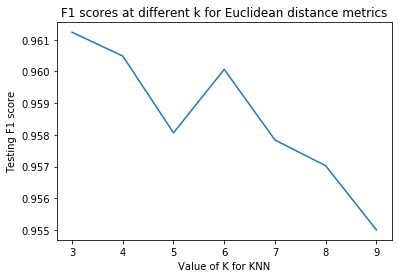

In [0]:
k=[3,4,5,6,7,8,9]
plt.plot(k, f1_scores_e)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing F1 score')
plt.title("F1 scores at different k for Euclidean distance metrics")

## **Predictions**
This method is performing the KNN classification using Manhattan distance as the distance metric. Here, we use different values of k ranging from 3 to 9. Analyzing the results, we see that **k=4** gives us the best accuracy. For k=4:
*   Accuracy: 95.525%
*   Precision score: 0.956
*   Recall score: 0.954
*   F1 score: 0.955

We also display the confusion matrix for each k.

In [0]:
scores_m = []
f1_scores_m = []
for k in range(3,10):
  prediction = []
  for row in validation_data:
    dis = manhattan_distance(row) 
    prediction.append(find_majority_label(k,dis))
  predicted_label = np.array(prediction)
  accuracy = accuracy_score(validation_label, predicted_label)
  print("k=",k,"Accuracy: ",accuracy*100)
  print("k=",k,"Precision score: ",precision_score(validation_label, predicted_label,  average='macro'))
  print("k=",k,"Recall score: ",recall_score(validation_label, predicted_label,  average='macro'))
  f1 = f1_score(validation_label, predicted_label,  average='macro')
  print("k=",k,"F1 score: ",f1)
  print(confusion_matrix(validation_label, predicted_label))
  scores_m.append(accuracy)
  f1_scores_m.append(f1)

k= 3 Accuracy:  95.375
k= 3 Precision score:  0.9553049975660622
k= 3 Recall score:  0.9531885849258745
k= 3 F1 score:  0.9537086024627313
[[410   0   0   0   0   3   0   0   0   1]
 [  0 413   0   0   0   0   1   1   1   0]
 [  4   7 354   2   0   0   1   4   0   0]
 [  0   1   2 393   0   6   0   1   5   4]
 [  0   4   0   0 353   0   2   1   0  10]
 [  2   6   0   8   0 350   4   0   0   6]
 [  2   0   0   0   0   1 396   1   0   0]
 [  0   8   0   1   4   0   0 422   1   5]
 [  3  12   2  11   1   3   3   3 346   9]
 [  1   3   0   3   6   3   0  12   0 378]]
k= 4 Accuracy:  95.525
k= 4 Precision score:  0.9565286243419509
k= 4 Recall score:  0.9548402681678514
k= 4 F1 score:  0.9552927080090337
[[407   0   1   1   0   3   2   0   0   0]
 [  0 412   0   0   0   0   1   2   1   0]
 [  3   5 357   2   0   0   1   4   0   0]
 [  0   1   1 390   0   7   0   1   9   3]
 [  0   3   0   0 353   1   2   2   0   9]
 [  2   6   0   7   0 354   4   0   0   3]
 [  1   0   0   0   0   2 396   1

### **Plotting**
Plotting Accuracy for different values of k, using manhattan distance as the distance metrics.

Text(0.5, 1.0, 'Accuracy at different k for Manhattan distance metrics')

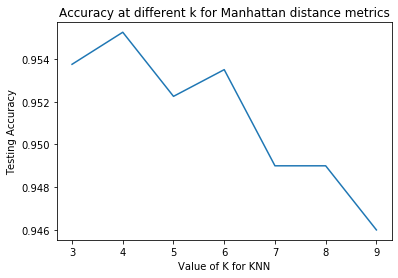

In [0]:
k=[3,4,5,6,7,8,9]
plt.plot(k, scores_m)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy at different k for Manhattan distance metrics")

### **Plotting**
Plotting F1 scores for different values of k, using manhattan distance as the distance metrics.

Text(0.5, 1.0, 'F1 scores at different k for Manhattan distance metrics')

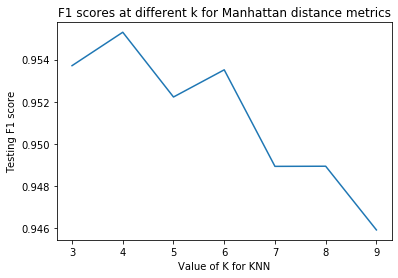

In [0]:
k=[3,4,5,6,7,8,9]
plt.plot(k, f1_scores_m)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing F1 score')
plt.title("F1 scores at different k for Manhattan distance metrics")

### **Plotting**
Plotting Accuracy for different values of k, using euclidean vs manhattan distance as the distance metrics.

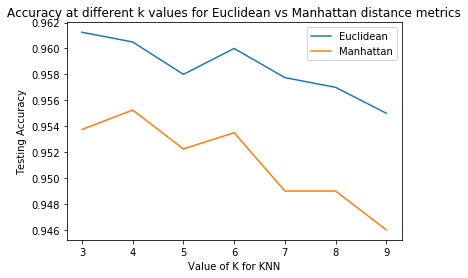

In [0]:
k = [3,4,5,6,7,8,9]
plt.plot(k, scores_e, label = "Euclidean")
plt.plot(k,scores_m, label = "Manhattan")
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title("Accuracy at different k values for Euclidean vs Manhattan distance metrics")
plt.legend()

### **Plotting**
Plotting F1 scores for different values of k, using euclidean vs manhattan distance as the distance metrics.

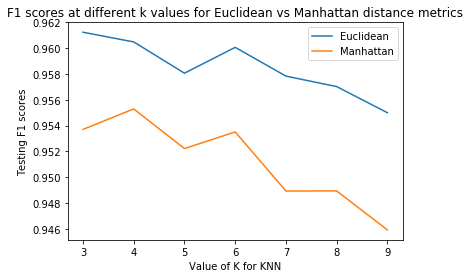

In [0]:
k = [3,4,5,6,7,8,9]
plt.plot(k, f1_scores_e, label = "Euclidean")
plt.plot(k,f1_scores_m, label = "Manhattan")
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing F1 scores')
plt.title("F1 scores at different k values for Euclidean vs Manhattan distance metrics")
plt.legend()

## **Predictions using Random guessing**
We use random guessing to predict the labels and get very poor accuracy and F1 score.

In [21]:
scores_re = []
f1_scores_re = []
# print(labels)
for k in range(3,10):
  prediction = []
  for row in validation_data:
    prediction.append(random_guessing())
  # print(prediction)
  predicted_label = np.array(prediction)
  accuracy = accuracy_score(validation_label, predicted_label)
  print("k=",k,"Accuracy: ",accuracy*100)
  print("k=",k,"Precision score: ",precision_score(validation_label, predicted_label,  average='macro'))
  print("k=",k,"Recall score: ",recall_score(validation_label, predicted_label,  average='macro'))
  f1 = f1_score(validation_label, predicted_label,  average='macro')
  print("k=",k,"F1 score: ",f1)
  print(confusion_matrix(validation_label, predicted_label))
  scores_re.append(accuracy)
  f1_scores_re.append(f1)

k= 3 Accuracy:  10.375
k= 3 Precision score:  0.10306257160092916
k= 3 Recall score:  0.10301030728586298
k= 3 F1 score:  0.1029663000712289
[[42 45 28 40 54 43 33 53 47 30]
 [39 58 43 51 48 39 34 50 47 36]
 [45 41 38 43 36 31 43 24 40 43]
 [39 40 42 49 38 37 44 35 39 45]
 [36 46 36 41 35 35 37 43 30 37]
 [32 37 38 33 35 30 27 38 38 42]
 [46 46 34 32 31 26 39 51 47 37]
 [57 46 44 43 50 30 41 52 38 41]
 [42 39 43 39 48 34 27 32 37 34]
 [36 61 40 34 35 29 50 48 48 35]]
k= 4 Accuracy:  10.375
k= 4 Precision score:  0.10377711810282483
k= 4 Recall score:  0.1034479149685863
k= 4 F1 score:  0.10350639394557823
[[41 45 44 37 38 26 45 46 43 50]
 [44 60 47 36 34 39 41 37 46 61]
 [40 35 34 33 36 41 47 44 37 37]
 [38 46 32 50 38 27 44 39 53 41]
 [47 32 35 40 41 24 37 34 52 34]
 [41 49 25 42 24 40 28 29 33 39]
 [41 46 40 39 42 31 37 45 38 30]
 [40 55 43 55 37 43 43 41 42 43]
 [31 47 36 24 40 38 41 36 30 52]
 [35 47 46 26 45 52 40 34 50 41]]
k= 5 Accuracy:  9.725
k= 5 Precision score:  0.096781812

## **Predictions on test data**
Using the value of k=3 , which gave us the best result in our training data,we test our model on the test data. We find out the accuracy score, precision score, recall score, F1 score and display the confusion matrix.
*   Accuracy: 96.89%
*   Precision score: 0.970
*   Recall score: 0.968
*   F1 score: 0.969

In [0]:
data = genfromtxt('/content/drive/My Drive/Assignment1 Dataset//Datasets/q1/train.csv', delimiter=',')
validation_data = genfromtxt('/content/drive/My Drive/Assignment1 Dataset//Datasets/q1/test.csv', delimiter=',')
validation_label = genfromtxt('/content/drive/My Drive/Assignment1 Dataset//Datasets/q1/test_labels.csv', delimiter=',')
train_data = data[:, 1:]
train_label = data[:, 0]

In [0]:
k=3
prediction = []
for row in validation_data:
  dis = euclidean_distance(row) 
  prediction.append(find_majority_label(k,dis))
predicted_label = np.array(prediction)
# print(predicted_label)
print("k= ",k,"Accuracy: ",accuracy_score(validation_label, predicted_label)*100)
print("k= ",k,precision_score(validation_label, predicted_label,  average='macro'))
print("k= ",k,recall_score(validation_label, predicted_label,  average='macro'))
print("k= ",k,f1_score(validation_label, predicted_label,  average='macro'))
print(confusion_matrix(validation_label, predicted_label))

k=  3 Accuracy:  96.89999999999999
k=  3 0.9703788802695111
k=  3 0.9685217759650383
k=  3 0.9690533807712107
[[ 93   0   0   0   0   0   1   0   0   0]
 [  0 101   0   0   0   0   0   0   0   0]
 [  0   0 107   0   0   0   0   1   0   0]
 [  0   0   0 107   0   0   1   0   0   0]
 [  0   1   0   0  83   0   1   0   0   6]
 [  0   0   0   1   0  79   0   0   1   0]
 [  0   0   0   0   0   0 101   0   0   0]
 [  0   2   1   0   1   0   0  97   0   3]
 [  1   0   1   3   0   2   0   0  93   0]
 [  1   0   1   0   0   0   0   2   0 108]]


## **Using scikit-learn’s kNN classifier**

In [0]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from numpy import genfromtxt
from sklearn.metrics import accuracy_score

In [0]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_data, train_label)
knn_pred = neigh.predict(validation_data)
accuracy_score(validation_label,knn_pred)

0.967

## **Comparison**
Using the KNN Classifier library of sklearn, we get an accuracy of **96.7%** for the k value of 4. We had seen that we got an accuracy of **96.89%** using our own model.
**Thus can conclude that our model performs better.**